This is my testing centre

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher
from PC_classes import mal_node


In [26]:
class analyser():

    def __init__(self):
        self.help = None 
        self.me = None 
        self.please = None 

    def get_res(self, i):

        num_of_runs = i
        j = 1
        results = []
        
        while j <= num_of_runs:
            df = pd.read_csv("confirmations"+str(j))
            length = df.shape[0]
            curRow = 0
            while curRow < length:
                next_time = df.iloc[curRow, 2]
                next_val = df.iloc[curRow, 1]
                if len(results) == 0:
                    results.append([next_time, next_val, 1])
                else:
                    res_counter = 0
                    len_res = len(results)
                    found = False   # Flag to dictate 
                    while (res_counter <= len_res) and found == False:
                        
                        if res_counter == len_res:
                            results.append([next_time, next_val, 1])
                            #print([next_time, next_val, 1, res_counter])
                            found = True

                        elif results[res_counter][0] == next_time:
                            results[res_counter][2] += 1
                            results[res_counter][1] = (results[res_counter][1]+next_val)
                            #print([next_time, next_val, "Fuck", res_counter])
                            found = True

                        elif (results[res_counter][0] > next_time) and (results[res_counter][0] != next_time):
                            i = res_counter
                            results.insert(i, [next_time, next_val, 1])
                            found = True
                        
                        res_counter += 1

                curRow += 1
            j += 1



        for x in results:
            temp = x[1]
            x[1] = temp/x[2]

        print(results)
        return results
    
    def plot_multi(self, i):
        j = 1
        while j <= i:
             df = pd.read_csv("confirmations"+str(j))
             times = df.time
             confirms = df.confirmations
             plt.plot(confirms, times, label="Experiment "+str(j))
             j += 1
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Confirmations')
        plt.title("Confirmations over Time")
        plt.show()

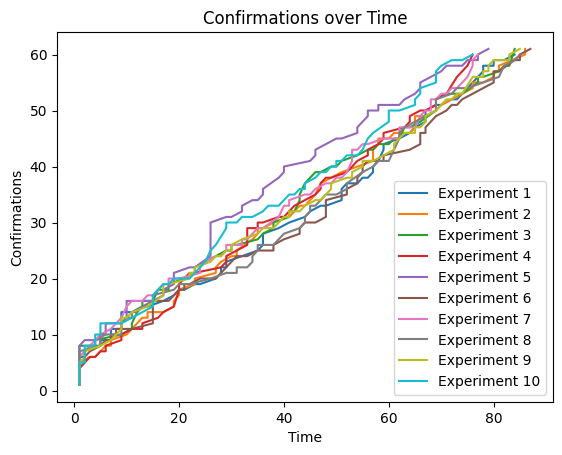

In [29]:
a = analyser()
#res = a.get_res(9)
#print("WHHHHHY")
a.plot_multi(10)